In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions
import matplotlib.dates as mdates
import GraphHelpers as GH
from bisect import bisect_left, bisect_right
%matplotlib inline

In [2]:
# Data extracted from CropData.cs InitialiseCropData() method
CropCoefficients = pd.read_excel('C:\\GitHubRepos\\Overseer-testing\\CropCoefficients\\CropCoefficients.xlsx')
CropCoefficients.set_index(['CropName'],inplace=True)
Categories = CropCoefficients.Category.drop_duplicates().values
CatFilt = (CropCoefficients.loc[:,'Category'] != 'Undefined') & (CropCoefficients.loc[:,'Category'] != 'Pasture')
CropCoefficients = CropCoefficients.loc[CatFilt,:]

LincolnMet = pd.read_csv('C:\GitHubRepos\Weather\Broadfields\LincolnClean.met',delimiter = '\t')
LincolnMet.name = 'Lincoln'
GoreMet = pd.read_csv('C:\GitHubRepos\Weather\OtherLocations\GoreClean.met',delimiter = '\t')
GoreMet.name = 'Gore'
WhatatuMet = pd.read_csv('C:\GitHubRepos\Weather\OtherLocations\WhatatuClean.met',delimiter = '\t')
WhatatuMet.name = 'Napier'
PukekoheMet = pd.read_csv('C:\GitHubRepos\Weather\OtherLocations\PukekoheClean.met',delimiter = '\t')
PukekoheMet.name = 'Pukekohe'

metFiles = [PukekoheMet,WhatatuMet,LincolnMet,GoreMet]

for f in metFiles:
    f.loc[:,'Date'] = pd.to_datetime(f.loc[:,'Date'])
    f.set_index('Date',inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


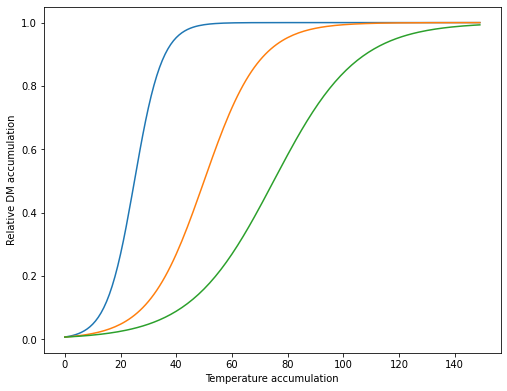

In [3]:
Fig = plt.figure(figsize=(18,14))
ax = Fig.add_subplot(2,2,1)
for Xo_Biomass in [25,50,75]:
    BiomassScaller = []
    Covers = []
    b_Biomass = Xo_Biomass*0.2
    A_cov = 1
    T_mat = Xo_Biomass*2
    T_sen = T_mat-30
    Xo_cov = T_mat * 0.25
    b_cov = Xo_cov * 0.2
    Tts = range(150)
    for tt in Tts:
        BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass)/(b_Biomass)))))
    DMscaller = pd.DataFrame(index=Tts,data=BiomassScaller,columns=['scaller'])
    plt.plot(DMscaller.loc[:,'scaller'])
plt.ylabel('Relative DM accumulation')
plt.xlabel('Temperature accumulation')

ax = Fig.add_subplot(2,2,1)

0.9926084586557181


Text(0.5, 0, 'Temperature accumulation')

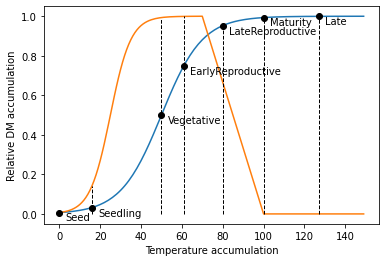

In [4]:
BiomassScaller = []
Covers = []
Xo_Biomass = 50
b_Biomass = Xo_Biomass*0.2
A_cov = 1
T_mat = Xo_Biomass*2
T_sen = T_mat-30
Xo_cov = T_mat * 0.25
b_cov = Xo_cov * 0.2
Tts = range(150)
for tt in Tts:
    BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass)/(b_Biomass)))))
    cover = 0
    if tt < T_sen:
        cover = A_cov * 1/(1+np.exp(-((tt-Xo_cov)/b_cov)))
    else:
        if tt < T_mat:
            cover = A_cov * (1-(tt-T_sen)/(T_mat-T_sen))
    Covers.append(cover)
DMscaller = pd.DataFrame(index=Tts,data=BiomassScaller,columns=['scaller'])
DMscaller.loc[:,'cover'] = Covers
print(DMscaller.loc[99,'scaller'])
plt.plot(DMscaller.loc[:,'scaller'])
plt.plot(DMscaller.loc[:,'cover'])
DMscaller.loc[:,'max'] = DMscaller.max(axis=1)

Methods = ['Seed','Seedling','Vegetative','EarlyReproductive','LateReproductive','Maturity','Late']
PrpnMaxDM = [0.0066,0.03,0.5,0.75,0.95,0.9933,0.9995]
StagePropns = pd.DataFrame(index = Methods, data = PrpnMaxDM,columns=['PrpnMaxDM']) 
for p in StagePropns.index:
    TTatProp = bisect_left(DMscaller.scaller,StagePropns.loc[p,'PrpnMaxDM'])
    StagePropns.loc[p,'PrpnTt'] = TTatProp/T_mat
    plt.plot(StagePropns.loc[p,'PrpnTt']*T_mat,StagePropns.loc[p,'PrpnMaxDM'],'o',color='k')
    plt.text(StagePropns.loc[p,'PrpnTt']*T_mat+3,StagePropns.loc[p,'PrpnMaxDM'],p,verticalalignment='top')
    plt.plot([StagePropns.loc[p,'PrpnTt']*T_mat]*2,[0,DMscaller.loc[round(StagePropns.loc[p,'PrpnTt'] * T_mat),'max']],'--',color='k',lw=1)
plt.ylabel('Relative DM accumulation')
plt.xlabel('Temperature accumulation')

0.9926084586557181


Text(0.5, 0, 'Temperature accumulation')

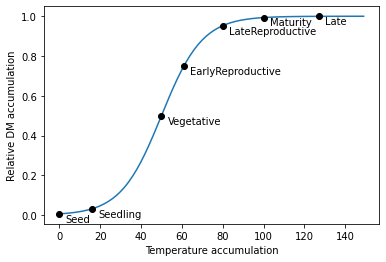

In [5]:
BiomassScaller = []
Covers = []
Xo_Biomass = 50
b_Biomass = Xo_Biomass*0.2
A_cov = 1
T_mat = Xo_Biomass*2
T_sen = T_mat-30
Xo_cov = T_mat * 0.25
b_cov = Xo_cov * 0.2
Tts = range(150)
for tt in Tts:
    BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass)/(b_Biomass)))))
    cover = 0
    if tt < T_sen:
        cover = A_cov * 1/(1+np.exp(-((tt-Xo_cov)/b_cov)))
    else:
        if tt < T_mat:
            cover = A_cov * (1-(tt-T_sen)/(T_mat-T_sen))
    Covers.append(cover)
DMscaller = pd.DataFrame(index=Tts,data=BiomassScaller,columns=['scaller'])
DMscaller.loc[:,'cover'] = Covers
print(DMscaller.loc[99,'scaller'])
plt.plot(DMscaller.loc[:,'scaller'])
DMscaller.loc[:,'max'] = DMscaller.max(axis=1)

Methods = ['Seed','Seedling','Vegetative','EarlyReproductive','LateReproductive','Maturity','Late']
PrpnMaxDM = [0.0066,0.03,0.5,0.75,0.95,0.9933,0.9995]
StagePropns = pd.DataFrame(index = Methods, data = PrpnMaxDM,columns=['PrpnMaxDM']) 
for p in StagePropns.index:
    TTatProp = bisect_left(DMscaller.scaller,StagePropns.loc[p,'PrpnMaxDM'])
    StagePropns.loc[p,'PrpnTt'] = TTatProp/T_mat
    plt.plot(StagePropns.loc[p,'PrpnTt']*T_mat,StagePropns.loc[p,'PrpnMaxDM'],'o',color='k')
    plt.text(StagePropns.loc[p,'PrpnTt']*T_mat+3,StagePropns.loc[p,'PrpnMaxDM'],p,verticalalignment='top')
plt.ylabel('Relative DM accumulation')
plt.xlabel('Temperature accumulation')

In [6]:
def CalcCovers(Tts, A_cov, Xo_cov, b_cov,T_sen,T_mat):
    Covers = []
    for tt in Tts:
        cover = 0
        if tt < T_sen:
            cover = A_cov * 1/(1+np.exp(-((tt-Xo_cov)/b_cov)))
        else:
            if tt < T_mat:
                cover = A_cov * (1-(tt-T_sen)/(T_mat-T_sen))
        Covers.append(cover)
    return Covers

def CalcBiomass(Tts,Xo_Biomass,b_Biomass):
    BiomassScaller = []
    for tt in Tts:
        BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass)/(b_Biomass)))))
    return BiomassScaller    

def NDilution(An,Bn,c,R):
    return An * (1 + Bn * np.exp(c*R))

def MakeDate(DateString,CheckDate):
    Date = datetime.date(2000,int(datetime.datetime.strptime(DateString.split('-')[1],'%b').month),int(DateString.split('-')[0]))
    if CheckDate == '':
        CheckDate = datetime.date(2000,1,1)
    if Date < CheckDate:
        Date = datetime.date(2001,int(datetime.datetime.strptime(DateString.split('-')[1],'%b').month),int(DateString.split('-')[0]))
    return Date

def tt(x,b):
    return max(0,x-b)

def firstIndex(series,threshold):
    pos=0
    passed = False
    while passed == False:
        if series.iloc[pos] < threshold:
            passed = True
        pos +=1
    return pos

def DeriveParamsAndGraph(ax,Met,Establish,Harvest,EstablishStage,HarvestStage):
    ## Calculate median thermaltime for location
    FirstYear = int(Met.Year[0])
    years = [int(x) for x in Met.Year.drop_duplicates().values[1:-1]]
    day = int(Establish.split('-')[0])
    month = datetime.datetime.strptime(Establish.split('-')[1],'%b').month
    FirstDate = datetime.datetime(FirstYear,month,day)

    Met.loc[:,'tt'] = [tt(x,5) for x in Met.Temp]
    TT = pd.DataFrame(columns = years,index = range(1,368))
    for y in years:
        start = Establish + '-' + str(y)
        end = Harvest + '-' + str(y+1)
        duration = (datetime.datetime.strptime(end,'%d-%b-%Y') - datetime.datetime.strptime(start,'%d-%b-%Y')).days
        try:
            TT.loc[:,y] = Met.loc[start:,'tt'].cumsum().values[:367]
        except:
            do = 'nothing'
    TTmed = (TT.median(axis=1))/30 # (TT.median(axis=1)-[5*x for x in TT.index])/30
    TTmed.index = pd.date_range(start=Establish+'-2000',periods=367,freq='D',name='Date')
    TTmed.name = 'Tt'

    ## Calculate date variables
    EstabDate = MakeDate(Establish,'')
    HarvestDate = MakeDate(Harvest,EstabDate)

    ## Calculate model parameters 
    Tt_Harv = TTmed[HarvestDate]
    Tt_estab = Tt_Harv * (StagePropns.loc[EstablishStage,'PrpnTt']/StagePropns.loc[HarvestStage,'PrpnTt'])
    Xo_Biomass = (Tt_Harv + Tt_estab) *.5 * (1/StagePropns.loc[HarvestStage,'PrpnTt'])
    b_Biomass = Xo_Biomass * .2

    # Calculate fitted patterns
    CropPatterns = pd.DataFrame(TTmed+Tt_estab)
    CropPatterns.loc[:,'biomass'] = CalcBiomass(CropPatterns.Tt.values,Xo_Biomass,b_Biomass) * 1/(StagePropns.loc[HarvestStage,'PrpnMaxDM']) * 200
    CropPatterns = CropPatterns.iloc[:duration,:]
    plt.plot(CropPatterns.index,CropPatterns.biomass)
    #plt.plot(CropPatterns.index,CropPatterns.nitrogen)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(EstabDate,HarvestDate)
    #plt.ylim(0,1.1)

def MineralisationGraph(ax,Met,Establish,Harvest,EstablishStage,HarvestStage,p):
    ## Calculate median thermaltime for location
    FirstYear = int(Met.Year[0])
    years = [int(x) for x in Met.Year.drop_duplicates().values[1:-1]]
    day = int(Establish.split('-')[0])
    month = datetime.datetime.strptime(Establish.split('-')[1],'%b').month
    FirstDate = datetime.datetime(FirstYear,month,day)

    Met.loc[:,'tt'] = [tt(x,5) for x in Met.Temp]
    TT = pd.DataFrame(columns = years,index = range(1,368))
    for y in years:
        start = Establish + '-' + str(y)
        end = Establish + '-' + str(y+1)
        try:
            TT.loc[:,y] = Met.loc[start:,'tt'].cumsum().values[:367]
        except:
            do = 'nothing'
    TTmed = (TT.median(axis=1))/30 # (TT.median(axis=1)-[5*x for x in TT.index])/30
    TTmed.index = pd.date_range(start=Establish+'-2000',periods=367,freq='D',name='Date')
    TTmed.name = 'Tt'

    ## Calculate date variables
    EstabDate = MakeDate(Establish,'')
    HarvestDate = MakeDate(Harvest,EstabDate)
    Tt_Harv = TTmed[HarvestDate]
    Tt_estab = Tt_Harv * (StagePropns.loc[EstablishStage,'PrpnTt']/StagePropns.loc[HarvestStage,'PrpnTt'])
    CropPatterns = pd.DataFrame(TTmed+Tt_estab)
    CropPatterns.loc[:,'biomass'] = CropPatterns.Tt.values * p
    plt.plot(CropPatterns.index,CropPatterns.biomass)
    #plt.plot(CropPatterns.index,CropPatterns.nitrogen)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(EstabDate,HarvestDate)
    #plt.ylim(0,1.1)

    
def Deficit(ax,Met,Establish,Harvest,EstablishStage,HarvestStage,r,m,initial):
    ## Calculate median thermaltime for location
    FirstYear = int(Met.Year[0])
    years = [int(x) for x in Met.Year.drop_duplicates().values[1:-1]]
    day = int(Establish.split('-')[0])
    month = datetime.datetime.strptime(Establish.split('-')[1],'%b').month
    FirstDate = datetime.datetime(FirstYear,month,day)

    Met.loc[:,'tt'] = [tt(x,5) for x in Met.Temp]
    TT = pd.DataFrame(columns = years,index = range(1,368))
    for y in years:
        start = Establish + '-' + str(y)
        end = Harvest + '-' + str(y+1)
        duration = (datetime.datetime.strptime(end,'%d-%b-%Y') - datetime.datetime.strptime(start,'%d-%b-%Y')).days
        try:
            TT.loc[:,y] = Met.loc[start:,'tt'].cumsum().values[:367]
        except:
            do = 'nothing'
    TTmed = (TT.median(axis=1))/30 # (TT.median(axis=1)-[5*x for x in TT.index])/30
    TTmed.index = pd.date_range(start=Establish+'-2000',periods=367,freq='D',name='Date')
    TTmed.name = 'Tt'
    ## Calculate date variables
    EstabDate = MakeDate(Establish,'')
    HarvestDate = MakeDate(Harvest,EstabDate)

    ## Calculate model parameters 
    Tt_Harv = TTmed[HarvestDate]
    Tt_estab = Tt_Harv * (StagePropns.loc[EstablishStage,'PrpnTt']/StagePropns.loc[HarvestStage,'PrpnTt'])
    Xo_Biomass = (Tt_Harv + Tt_estab) *.5 * (1/StagePropns.loc[HarvestStage,'PrpnTt'])
    b_Biomass = Xo_Biomass * .2

    # Calculate fitted patterns
    CropPatterns = pd.DataFrame(TTmed+Tt_estab)
    CropPatterns.loc[:,'biomass'] = CalcBiomass(CropPatterns.Tt.values,Xo_Biomass,b_Biomass) * 1/(StagePropns.loc[HarvestStage,'PrpnMaxDM']) * 200
    CropPatterns.loc[:,'residue'] = CropPatterns.Tt.values * r
    CropPatterns.loc[:,'mineralisation'] = CropPatterns.Tt.values * m
    CropPatterns.loc[:,'mineral'] = initial
    for d in range(1,CropPatterns.index.size):
        CropPatterns.iloc[d,4] = CropPatterns.iloc[d-1,4]+CropPatterns.iloc[:,2].diff()[d]+CropPatterns.iloc[:,3].diff()[d]-CropPatterns.iloc[:,1].diff()[d] 
    CropPatterns = CropPatterns.iloc[:duration,:]
    plt.plot(CropPatterns.index,CropPatterns.mineral)
    FertDate = firstIndex(CropPatterns.mineral,35)
    plt.plot([CropPatterns.index[0],CropPatterns.index[-1]],[35,35],'--',color = 'k')
    deficit = CropPatterns.mineral.min()
    plt.plot([CropPatterns.index[FertDate]]*2,[35,deficit],'--',color='k',lw=1)
    plt.plot([CropPatterns.index[FertDate],datetime.datetime.strptime(end,'%d-%b-%Y')],[deficit,deficit],'--',color='k',lw=1)
    NReq =-deficit+35
    recString = CropPatterns.index[FertDate].strftime('%d-%b') +'\n' +str(int(NReq)) + ' kg/ha'
    plt.text(CropPatterns.index[FertDate-2],deficit*.5,recString,fontsize=10,horizontalalignment='right',verticalalignment='center')
    #plt.plot(CropPatterns.index,CropPatterns.nitrogen)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(EstabDate,HarvestDate)
    return CropPatterns

In [7]:
start = '15-Sep-2000'
end = '10-May-2001'
(datetime.datetime.strptime(end,'%d-%b-%Y') - datetime.datetime.strptime(start,'%d-%b-%Y')).days

237

In [8]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [9]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

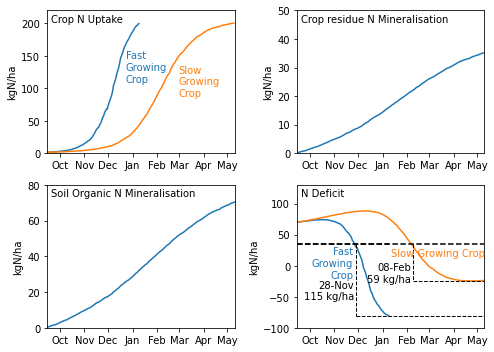

In [10]:
Fig = plt.figure(figsize=(7,5))
ax = Fig.add_subplot(2,2,1)
for h in ['10-Jan','10-May']:
    DeriveParamsAndGraph(ax,LincolnMet,'15-Sep',h,'Seed','LateReproductive')
plt.ylabel('kgN/ha')
plt.ylim(0,220)
plt.text(0.02,0.92,'Crop N Uptake',transform=ax.transAxes)
plt.text(0.42,0.5,'Fast\nGrowing\nCrop',transform=ax.transAxes,color = '#1f77b4')
plt.text(0.7,0.4,'Slow\nGrowing\nCrop',transform=ax.transAxes,color = '#ff7f0e')
ax = Fig.add_subplot(2,2,2)
for p in [0.5]:
    MineralisationGraph(ax,LincolnMet,'15-Sep','10-May','Seed','LateReproductive',p)
plt.ylabel('kgN/ha')
plt.ylim(0,50)
plt.text(0.02,0.92,'Crop residue N Mineralisation',transform=ax.transAxes)
ax = Fig.add_subplot(2,2,3)
for p in [1.0]:
    MineralisationGraph(ax,LincolnMet,'15-Sep','10-May','Seed','LateReproductive',p)
plt.ylabel('kgN/ha')
plt.ylim(0,80)
plt.text(0.02,0.92,'Soil Organic N Mineralisation',transform=ax.transAxes)
ax = Fig.add_subplot(2,2,4)
for h in ['10-Jan','10-May']:
    Deficit(ax,LincolnMet,'15-Sep',h,'Seed','LateReproductive',0.5,1,70)
plt.ylabel('kgN/ha')
plt.ylim(-100,130)
plt.text(0.02,0.92,'N Deficit',transform=ax.transAxes)
plt.text(0.3,0.35,'Fast\nGrowing\nCrop',transform=ax.transAxes,color = '#1f77b4',horizontalalignment='right')
plt.text(0.5,0.5,'Slow Growing Crop',transform=ax.transAxes,color = '#ff7f0e')
plt.tight_layout()

In [11]:
def PlotCoverRange(Graph, SowDate,T_sen,T_mat,refcrop,A_cov,b_cov,Xo_cov):
    #Met = globals()[Site+'Met']
    pos=1
    StartDateStrN = SowDate +'-'+ '2018'
    T_sen *= 30
    T_mat *= 30
    if A_cov == '':
        A_cov = 1
    if Xo_cov == '':
        Xo_cov = T_sen * 0.2
    else:
        Xo_cov = Xo_cov * 30 
    if b_cov == '':
        b_cov = Xo_cov * .2
    else:
        b_cov = b_cov * 30

    for Met in metFiles:

        CoverFrame = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
        #Graph = plt.figure(figsize=(10,4))
        ax = Graph.add_subplot(2,4,pos)
        for y in Met.Year.drop_duplicates()[1:-1]:
            StartDateStr = SowDate +'-'+ str(int(y))
            StartDate = datetime.datetime.strptime(StartDateStr,'%d-%b-%Y')
            DateSeries = pd.date_range(StartDate,periods=400)
            Tts = Met.reindex(DateSeries,axis=0).reindex(['MinT','MaxT'],axis=1).mean(axis=1).cumsum()
            Covers = []
            #Tts = range(T_mat)
            for tt in Tts:
                cover = 0
                if tt < T_sen:
                    cover = A_cov * 1/(1+np.exp(-((tt-Xo_cov)/b_cov)))
                else:
                    if tt < T_mat:
                        cover = A_cov * (1-(tt-T_sen)/(T_mat-T_sen))
                Covers.append(cover)
            PlotDates = pd.date_range(StartDateStrN,periods=400)
            plt.plot(PlotDates,Covers,color='b',lw=1,alpha=0.3)
            CoverFrame.loc[:,y] = Covers
        plt.plot(CoverFrame.median(axis=1),lw=3,color='b')
        CritCov = A_cov * 0.95
        CoverMedians = CoverFrame.median(axis=1)
        onePos = 0
        lastCover = 0
        for x in CoverMedians:
            if x < lastCover:
                break
            onePos +=1
            lastCover = x

        CritCovpos = bisect_left(CoverMedians[:onePos],CritCov)
        CritCovDate = CoverFrame.index.get_level_values(0)[CritCovpos]
        plt.arrow(CritCovDate,CritCov,0,CritCov*-0.95,head_width = 20,head_length=A_cov*0.05,color='k')
        plt.text(CritCovDate+datetime.timedelta(days=5), A_cov * 0.05, 'Canopy \n closure \n'+datetime.date.strftime(CritCovDate,'%d-%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
        if pos == 1:
            plt.ylabel('Canopy Cover',fontsize=18)
            plt.tick_params(labelsize=14)
            plt.tick_params(axis='x',rotation = 45)
        else:
            plt.tick_params(labelleft=False)
        plt.tick_params(labelbottom = False)
        plt.title(Met.name, fontsize = 16)

        c = refcrop
        if c != '':
            data = CropCoefficients.loc[:,['T_Senescence', 'T_Maturity', 'Xo_Cover',
                   'b_Cover', 'a_Cover']]
            StartDateStr = SowDate +'-'+ str(int( Met.Year.drop_duplicates()[2]))
            StartDate = datetime.datetime.strptime(StartDateStr,'%d-%b-%Y')
            DateSeries = pd.date_range(StartDate,periods=400)
            Tts = Met.reindex(DateSeries,axis=0).reindex(['MinT','MaxT'],axis=1).mean(axis=1).cumsum()
            Covers = []
            for tt in Tts:
                cover = 0
                if tt < data.loc[c,'T_Senescence']*30:
                    cover = data.loc[c,'a_Cover'] * 1/(1+np.exp(-((tt-data.loc[c,'Xo_Cover']*30)/(data.loc[c,'b_Cover']*30))))
                else:
                    if tt < data.loc[c,'T_Maturity']*30:
                        cover = data.loc[c,'a_Cover'] * (1-(tt-data.loc[c,'T_Senescence']*30)/(data.loc[c,'T_Maturity']*30-data.loc[c,'T_Senescence']*30))
                Covers.append(cover)

            plt.plot(PlotDates,Covers,'--',color='k',lw=3,alpha=0.3)
        pos +=1
    

In [12]:
def PlotBiomassRange(Graph,SowDate,refcrop,TypYld,k_DM,HI,T_mat,b_Biomass,Xo_Biomass,HarvestType):
    #Met = globals()[Site+'Met']
    data = CropCoefficients.loc[:,['Typyld', 'k_DM', 'Xo_Biomass','b_Biomass','T_Maturity',
                                  'a_Harvest','b_harvest']]
    StartDateStrN = SowDate +'-'+ '2018'
    pos = 5
    if Xo_Biomass == '':
        Xo_Biomass = T_mat * 0.2
    if b_Biomass == '':
        b_Biomass = T_mat * 0.1
    for Met in metFiles:
        ax = Graph.add_subplot(2,4,pos)
        Yields = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
        DMs = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
        for y in Met.Year.drop_duplicates()[1:-1]:
            StartDateStr = SowDate +'-'+ str(int(y))
            StartDate = datetime.datetime.strptime(StartDateStr,'%d-%b-%Y')
            DateSeries = pd.date_range(StartDate,periods=400)
            Tts = Met.reindex(DateSeries,axis=0).reindex(['MinT','MaxT'],axis=1).mean(axis=1).cumsum()
            BiomassScaller = []
            for tt in Tts:
                 BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass*30)/(b_Biomass*30)))))
            PlotDates = pd.date_range(StartDateStrN,periods=400)
            Yield = np.multiply(BiomassScaller,TypYld * 1/HarvestTypes.loc[HarvestType,'PrpnMaxDM'])
            DM = np.multiply(Yield*k_DM,1/HI)
            plt.plot(PlotDates,Yield,lw=1,alpha=0.3,color='orange')
            plt.plot(PlotDates,DM,'--',lw=1,alpha=0.3,color='g')
            Yields.loc[:,y] = Yield
            DMs.loc[:,y] = DM
        plt.plot(Yields.median(axis=1),lw=3,color='orange')
        plt.plot(DMs.median(axis=1),lw=3,color='g')
        FinalYield = min(TypYld * 0.99,Yields.median(axis=1)[-1])
        FinalYieldpos = bisect_left(Yields.median(axis=1),FinalYield)
        FinalYieldDate = Yields.index.get_level_values(0)[FinalYieldpos]
        start = Yields.index.get_level_values(0)[0]
        plt.arrow(FinalYieldDate,FinalYield,0,FinalYield*-0.95,head_width = 20,head_length=FinalYield*0.3,color='k')
        plt.text(FinalYieldDate+datetime.timedelta(days=5), TypYld * 0.05, 'Harvest \nDate \n'+datetime.date.strftime(FinalYieldDate,'%d-%b'),fontsize=14)
        plt.arrow(start,FinalYield,(FinalYieldDate-start).days,0)
        plt.text(start+datetime.timedelta(days=5), FinalYield * .99, 'Harvest \nYield \n'+str(TypYld),fontsize=14,verticalalignment='top')
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
        if pos == 5:
            plt.ylabel('CropBiomass',fontsize=18)
        else:
            plt.tick_params(labelleft=False)
        plt.tick_params(labelsize=14)
        plt.tick_params(axis='x',rotation = 45)

        c = refcrop
        if c != '':
            Covers = []
            rTypYld = data.loc[c,'Typyld']
            rHI = data.loc[c,'a_Harvest'] + data.loc[c,'b_harvest'] * rTypYld * 1000            
            BiomassScaller = []
            for tt in Tts:
                BiomassScaller.append(1/(1+np.exp(-((tt-data.loc[c,'Xo_Biomass']*30)/(data.loc[c,'b_Biomass']*30)))))
            Yield = np.multiply(BiomassScaller,rTypYld)
            DM = np.multiply(Yield*data.loc[c,'k_DM'],1/rHI)
            plt.plot(PlotDates,Yield,'--',color='k',lw=3,alpha=0.3)
            plt.plot(PlotDates,DM,'--',color='k',lw=3,alpha=0.3)
        pos +=1

In [13]:
list(CropCoefficients.index)

['Barleyspring',
 'Maizeshort',
 'Maizemedium',
 'Maizelong',
 'Oatsspring',
 'Oatsautumn',
 'Wheatspring',
 'Wheatautumn',
 'Broccoliwinterspring',
 'Broccolisummer',
 'BrusselSprouts',
 'Cabbagewinterspring',
 'Cabbagesummer',
 'Cauliflowerwinterspring',
 'Cauliflowersummer',
 'Lettuce',
 'Spinach',
 'Beansgreen',
 'Beansdried',
 'Lentils',
 'Peasgreen',
 'Peasdried',
 'Kumara',
 'Potatoshort',
 'Potatomedium',
 'Potatolong',
 'Beets',
 'Carrots',
 'Parsnips',
 'Cloverseed',
 'Ryegrassseed',
 'Onions',
 'Sweetcorn',
 'Squash',
 'Tomato',
 'Brassica',
 'Lupins',
 'Mustard',
 'Oatsandrye',
 'Phacelia',
 'Annualryegrass',
 'Foragebarleyspring',
 'Forageoatsspring',
 'Forageoatsautumn',
 'Maizesilage',
 'Ryecornspring',
 'Ryecornautumn',
 'Triticalespring',
 'Triticaleautumn',
 'FodderBeets',
 'Kale',
 'Rape',
 'Swedes',
 'TurnipsBulb',
 'TurnipsLeafy']

In [14]:
EndMethods = ['Incorporate','Cut','Desicate','Maturity']
HarvestTypes = pd.DataFrame(index = EndMethods,columns=['PrpnMaxDM'])
HarvestTypes.loc[:,'PrpnMaxDM'] = [0.6,0.6,0.95,0.99]
HarvestTypes

,PrpnMaxDM
Incorporate,0.60
Cut,0.60
Desicate,0.95
Maturity,0.99


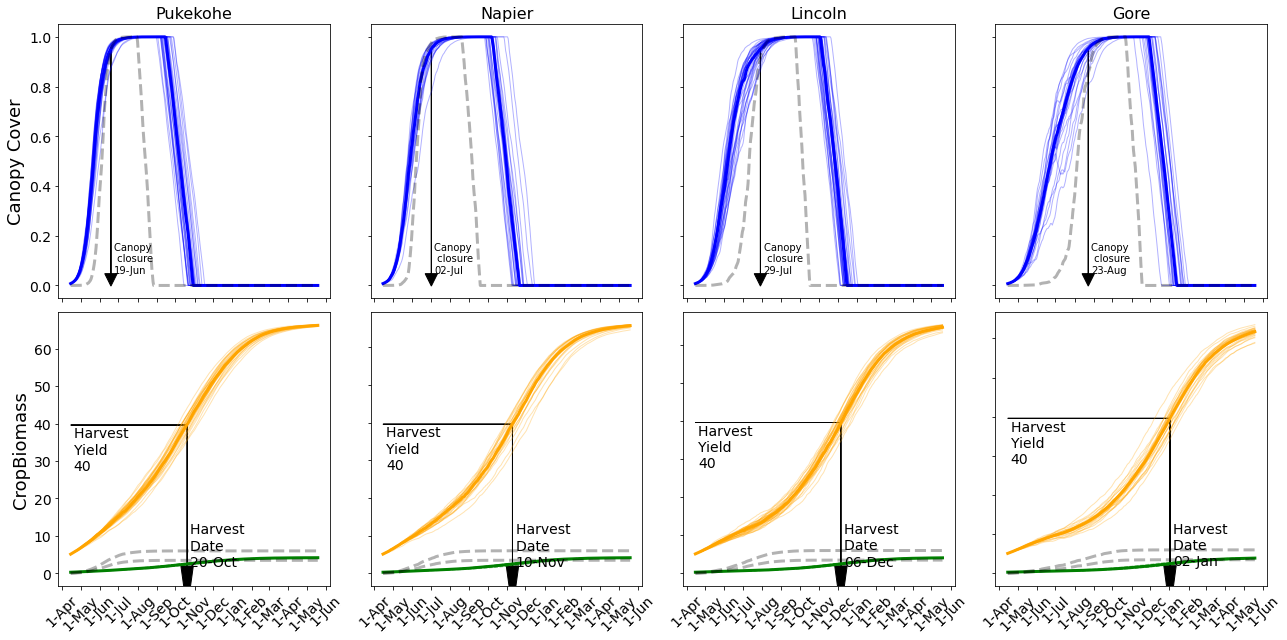

In [15]:
Graph = plt.figure(figsize=(18,9))
ref='Peasdried'
sow='15-Apr'
Tt_maturity = 80
PlotBiomassRange(Graph, SowDate = sow, refcrop = ref, TypYld = 40, k_DM = .04, HI = 0.63, 
                 T_mat = Tt_maturity,b_Biomass = 65*.4,Xo_Biomass = 65, HarvestType = 'Incorporate')

PlotCoverRange(Graph, SowDate = sow, T_sen = 60, T_mat = Tt_maturity, refcrop = ref,
               A_cov = '', b_cov = '', Xo_cov =18 )
Graph.tight_layout()

Text(0.5, 0, 'Yield (kg/ha)')

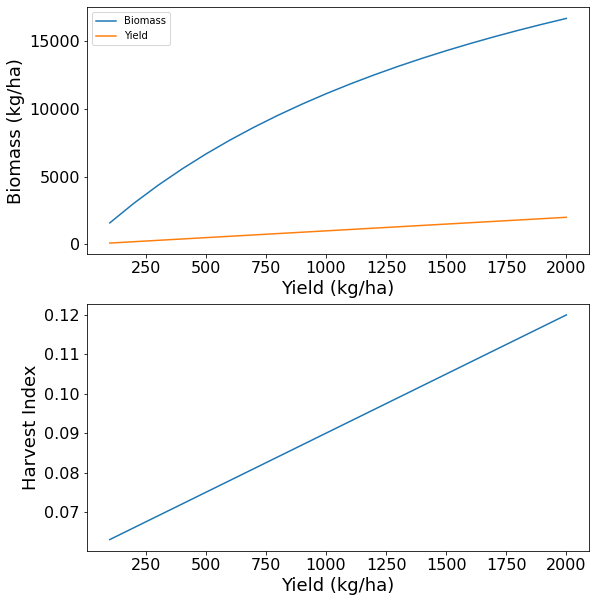

In [16]:
TypicalYield = 1000
a_harvestIndex = 0.06
b_harvestIndex = 0.00003

yields = np.array(range(1,21))*.1 * TypicalYield
HI = [a_harvestIndex + x * b_harvestIndex for x in yields]
Biomass = [yields[x] * 1/HI[x] for x in range(len(yields))]

Graph = plt.figure(figsize=(9,10))
ax = Graph.add_subplot(2,1,1)
plt.plot(yields,Biomass,'-',label='Biomass')
plt.plot(yields,yields,'-',label='Yield')
plt.legend()
plt.tick_params(labelsize=16)
plt.ylabel('Biomass (kg/ha)',fontsize=18)
plt.xlabel('Yield (kg/ha)',fontsize=18)
ax = Graph.add_subplot(2,1,2)
plt.plot(yields,HI)
plt.tick_params(labelsize=16)
plt.ylabel('Harvest Index',fontsize=18)
plt.xlabel('Yield (kg/ha)',fontsize=18)

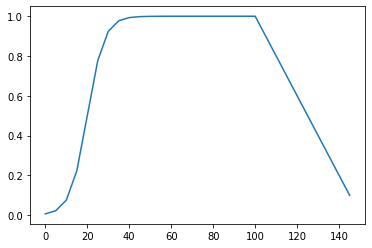

In [17]:
Tts = range(0,150,5)
A_cov = 1
T_sen = 100
T_mat = 150
Xo_cov = T_sen * 0.2
b_cov = Xo_cov * 0.2
Covers = []
#Tts = range(T_mat)
for tt in Tts:
    cover = 0
    if tt < T_sen:
        cover = A_cov * 1/(1+np.exp(-((tt-Xo_cov)/b_cov)))
    else:
        if tt < T_mat:
            cover = A_cov * (1-(tt-T_sen)/(T_mat-T_sen))
    Covers.append(cover)

plt.plot(Tts,Covers)

0.941463097125632

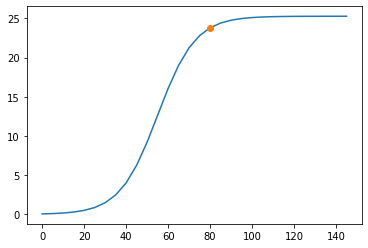

In [18]:
BiomassScaller = []
Xo_Biomass = 55
b_Biomass = 9
HI = 0.95
TypYld = 24
for tt in Tts:
     BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass)/(b_Biomass)))))
Yield = np.multiply(BiomassScaller,TypYld * 1/HI)
plt.plot(Tts,Yield)

Harvest_tt = 80
Harvest_Biomass = TypYld * 1/HI * 1/(1+np.exp(-((Harvest_tt-Xo_Biomass)/(b_Biomass))))
plt.plot(Harvest_tt,Harvest_Biomass,'o')
1/(1+np.exp(-((Harvest_tt-Xo_Biomass)/(b_Biomass))))


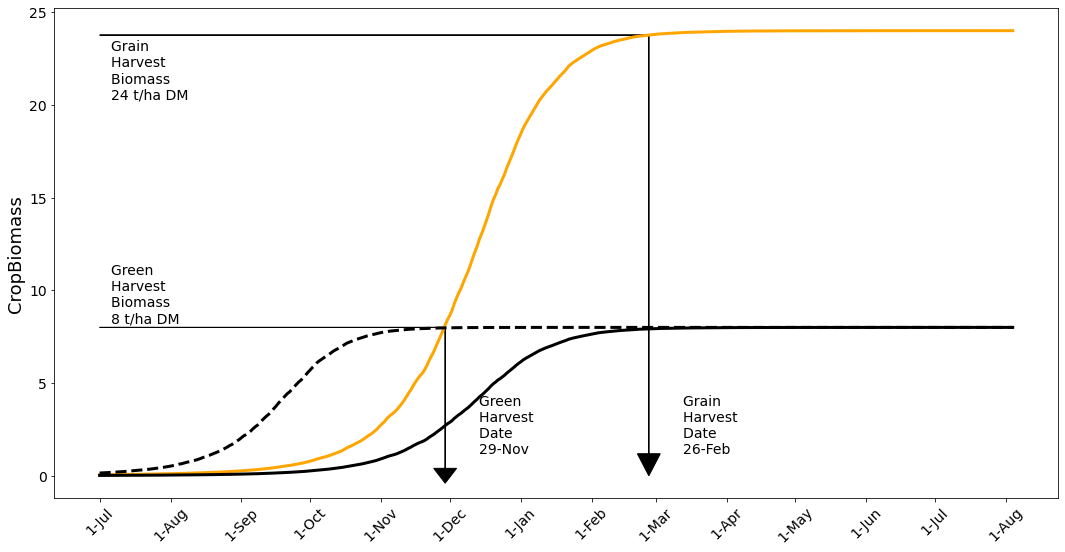

In [19]:
Graph = plt.figure(figsize=(18,9))
SowDate = '1-Jul'
StartDateStrN = SowDate +'-'+ '2018'
Met = metFiles[2]
Xo_Biomass = 55
b_Biomass = 9
HI = 0.95
TypYld = 24
k_DM = 1.0
GreenYield = 8
ax = Graph.add_subplot(1,1,1)
Yields = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
DMs = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
GreenYields = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
GreenYields2 = pd.DataFrame(index = pd.date_range(StartDateStrN,periods=400))
for y in Met.Year.drop_duplicates()[1:-1]:
    StartDateStr = SowDate +'-'+ str(int(y))
    StartDate = datetime.datetime.strptime(StartDateStr,'%d-%b-%Y')
    DateSeries = pd.date_range(StartDate,periods=400)
    Tts = Met.reindex(DateSeries,axis=0).reindex(['MinT','MaxT'],axis=1).mean(axis=1).cumsum()
    BiomassScaller = []
    BiomassScaller2 = []
    for tt in Tts:
        BiomassScaller.append(1/(1+np.exp(-((tt-Xo_Biomass*30)/(b_Biomass*30)))))
        BiomassScaller2.append(1/(1+np.exp(-((tt-20*30)/(5*30)))))
    PlotDates = pd.date_range(StartDateStrN,periods=400)
    Yield = np.multiply(BiomassScaller,TypYld)
    #plt.plot(PlotDates,Yield,lw=1,alpha=0.3,color='orange')
    DM = np.multiply(Yield*k_DM,1/HI)
    #plt.plot(PlotDates,DM,'--',lw=1,alpha=0.3,color='g')
    GreenYieldd = np.multiply(BiomassScaller,GreenYield)
    GreenYield2 = np.multiply(BiomassScaller2,GreenYield)
    Yields.loc[:,y] = Yield
    DMs.loc[:,y] = DM
    GreenYields.loc[:,y] = GreenYieldd
    GreenYields2.loc[:,y] = GreenYield2
plt.plot(Yields.median(axis=1),lw=3,color='orange')
#plt.plot(DMs.median(axis=1),lw=3,color='g')
plt.plot(GreenYields.median(axis=1),lw=3,color='k')
plt.plot(GreenYields2.median(axis=1),'--',lw=3,color='k')
FinalYield = min(TypYld * 0.99,Yields.median(axis=1)[-1])
FinalYieldpos = bisect_left(Yields.median(axis=1),FinalYield)
FinalYieldDate = Yields.index.get_level_values(0)[FinalYieldpos]
start = Yields.index.get_level_values(0)[0]
plt.arrow(FinalYieldDate,FinalYield,0,FinalYield*-0.95,head_width = 10,head_length=FinalYield*0.05,color='k')
plt.text(FinalYieldDate+datetime.timedelta(days=15), TypYld * 0.05, 'Grain \nHarvest \nDate \n'+datetime.date.strftime(FinalYieldDate,'%d-%b'),fontsize=14)
plt.arrow(start,FinalYield,(FinalYieldDate-start).days,0)
plt.text(start+datetime.timedelta(days=5), FinalYield * .99, 'Grain \nHarvest \nBiomass \n'+str(TypYld) + ' t/ha DM',fontsize=14,verticalalignment='top')
if GreenYield != '':
    GreenYieldPos = bisect_left(Yields.median(axis=1),GreenYield)
    GreenYieldDate = Yields.index.get_level_values(0)[GreenYieldPos]
    plt.arrow(GreenYieldDate,GreenYield,0,GreenYield*-0.95,head_width = 10,head_length=GreenYield*0.1,color='k')
    plt.text(GreenYieldDate+datetime.timedelta(days=15), TypYld * 0.05, 'Green \nHarvest \nDate \n'+datetime.date.strftime(GreenYieldDate,'%d-%b'),fontsize=14)
    plt.arrow(start,GreenYield,(GreenYieldDate-start).days,0)
    plt.text(start+datetime.timedelta(days=5), GreenYield * 1.01, 'Green \nHarvest \nBiomass \n'+str(GreenYield) + ' t/ha DM',fontsize=14,verticalalignment='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.ylabel('CropBiomass',fontsize=18)
plt.tick_params(labelsize=14)
plt.tick_params(axis='x',rotation = 45)
